# Detección de Fraude en Transacciones Financieras con Machine Learning
**Por: Nancy**
*Este proyecto busca identificar fraudes en tarjetas de crédito utilizando el algoritmo Random Forest, enfrentando el desafío de los datos altamente desbalanceados.*

### 1. Carga de datos y Análisis Exploratorio
Cargamos el dataset y revisamos la distribución de las clases para entender el grado de desbalance entre transacciones normales y fraudulentas.

In [1]:
import pandas as pd

datos= pd.read_csv(r'C:\Users\Outlet\Desktop\Nueva carpeta (2)\creditcard.csv')
datos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
print('cantidad de filas:', datos.shape[0])
print('cantidad de columnas:', datos.shape[1])     

cantidad de filas: 284807
cantidad de columnas: 31


In [3]:
datos.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
total= datos.isnull().sum().sort_values(ascending=False)
percent= (datos.isnull().sum()/datos.isnull().count()*100).sort_values(ascending=False)
pd.concat([total,percent], axis=1,keys=['cant total','porcentaje']).transpose()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
cant total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
porcentaje,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
print('No Frauds', round(datos['Class'].value_counts()[0]/len(datos)*100,2),'% del conjunto de datos')
print('Frauds',round(datos['Class'].value_counts()[1]/len(datos)*100,2), '% del conjunto de datos')
      

No Frauds 99.83 % del conjunto de datos
Frauds 0.17 % del conjunto de datos


Text(0.5, 1.0, 'Distribución de las clases \n(0: No Fraud|| 1:Fraud)')

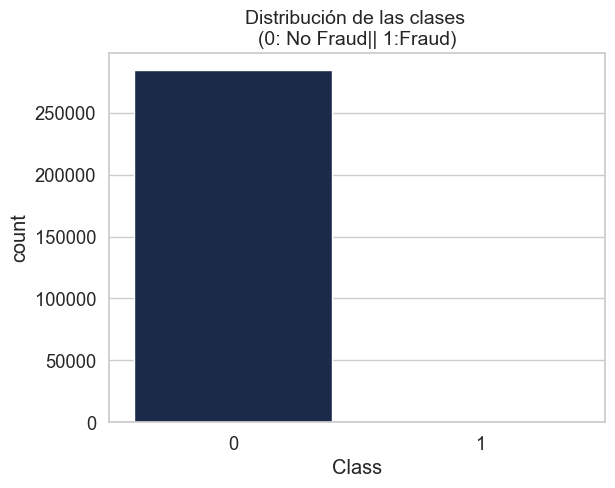

In [30]:
colors=['#142850','#00a8cc']

sns.countplot(x='Class', data=datos, hue='Class', palette=colors, legend=False)
plt.title('Distribución de las clases \n(0: No Fraud|| 1:Fraud)', fontsize=14)



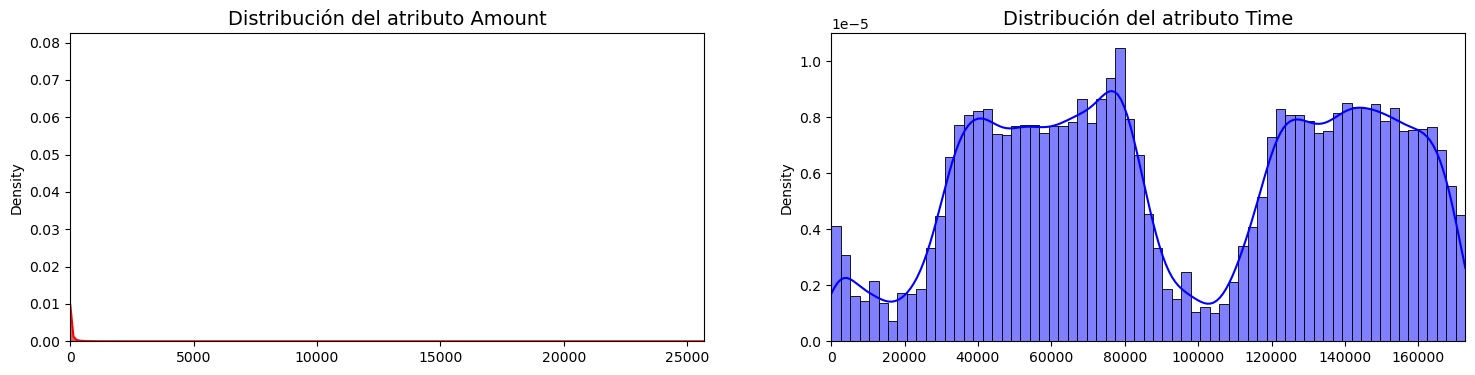

In [8]:
fig,ax = plt.subplots(1,2,figsize=(18,4))
amount_val= datos['Amount'].values
time_val=datos['Time'].values

sns.histplot(amount_val,ax=ax[0], color='r',kde=True, stat="density")
ax[0].set_title('Distribución del atributo Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val,ax=ax[1],color='b',kde=True, stat="density")
ax[1].set_title('Distribución del atributo Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()


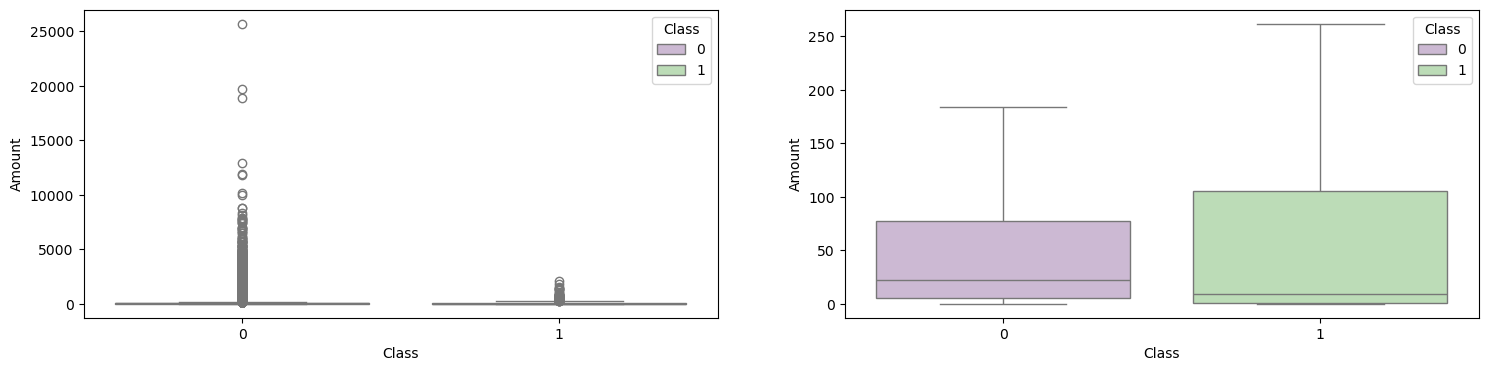

In [9]:

#Distribución de Amount según Class

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,4))

#creacioón del boxplot con outliers

s= sns.boxplot( ax=ax1, x='Class', y='Amount', hue='Class', data=datos, palette='PRGn', showfliers=True)

#creacioón del boxplot sin outliers

s= sns.boxplot( ax=ax2, x='Class', y='Amount', hue='Class', data=datos, palette='PRGn', showfliers=False)
plt.show()




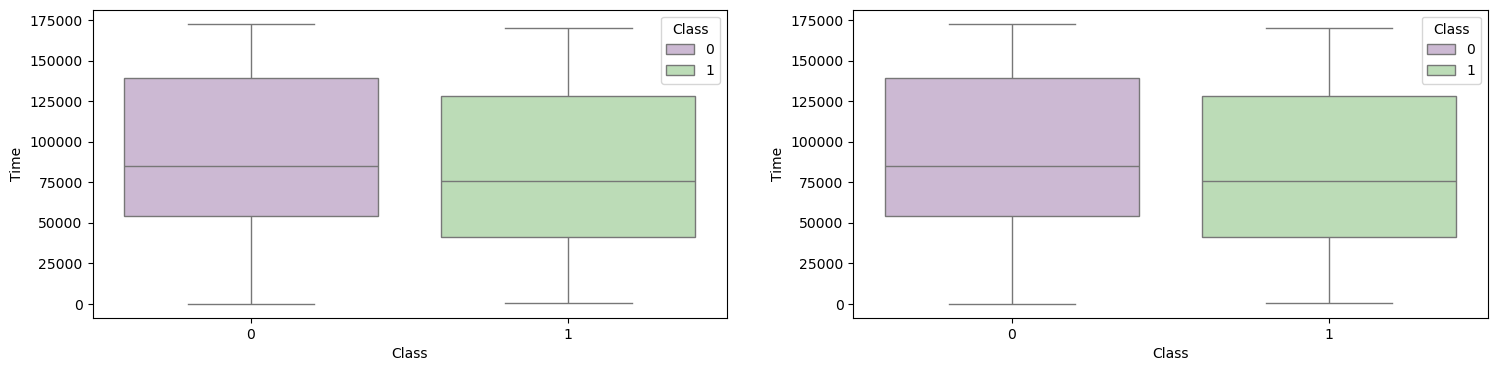

In [10]:
#Distribución de Time según Class

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,4))

#creacioón del boxplot con outliers

s= sns.boxplot( ax=ax1, x='Class', y='Time', hue='Class', data=datos, palette='PRGn', showfliers=True)

#Creacioón del boxplot sin outliers

s= sns.boxplot( ax=ax2, x='Class', y='Time', hue='Class', data=datos, palette='PRGn', showfliers=False)
plt.show()


### 2. Preprocesamiento y Escalado de Variables
Dado que variables como 'Amount' y 'Time' tienen escalas muy diferentes a las variables 'V', aplicamos un escalado robusto y eliminamos las columnas originales para no confundir al modelo.

In [11]:
#Scaling de Amount


from sklearn.preprocessing import StandardScaler


datos['scaledAmount'] = StandardScaler().fit_transform(datos['Amount'].values.reshape(-1, 1))


datos = datos.drop(['Amount'], axis=1)

datos.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaledAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [12]:

datos['scaledTime']= StandardScaler().fit_transform(datos['Time'].values.reshape(-1,1))
datos = datos.drop(['Time'],axis=1)
datos.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaledAmount,scaledTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


### 3. Balanceo del Dataset (Undersampling)
Como menos del 1% de los datos son fraude, aplicamos una técnica de sub-muestreo. Seleccionamos una muestra aleatoria de transacciones normales igual a la cantidad de fraudes (492) para que el modelo aprenda a distinguir ambas clases equitativamente.

In [13]:

#Resampling
#import imblearn
datos = datos.sample(frac=1)

#492 filas de registros fraud
fraud_df = datos.loc[datos['Class']==1]

#seleccionamos la misma cantidad de resgistros no fraudes
non_fraud_df = datos.loc[datos['Class']==0][:492]

#union de ambos dataframes
normal_distributed_df= pd.concat([fraud_df,non_fraud_df])

#reordenamiento del dataframe de manera aleatoria
new_df = normal_distributed_df.sample(frac=1, random_state= 42)
new_df.head()




,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaledAmount,scaledTime
48661,-0.604072,-0.738427,0.109742,-3.565178,0.853530,3.709778,-0.226731,0.753213,-2.432424,0.762218,...,-0.853660,0.047905,0.941031,-0.055969,-0.554661,0.058701,0.062750,0,0.341238,-1.075699
274475,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,-2.516628,...,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,1,-0.193706,1.499622
218522,-1.668202,1.019051,-1.353896,-0.457560,0.557883,-0.898311,-0.011765,0.926463,-0.148947,-0.445736,...,-0.700503,0.781761,0.582138,-0.192401,0.141874,0.356000,-0.042335,0,-0.313289,0.979870
17480,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,-3.565738,-7.731071,...,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,1,0.046539,-1.391062
87354,-1.522305,1.505152,0.372364,2.286869,-0.526519,0.998593,-1.087556,-0.027248,-0.533001,0.169573,...,0.493981,-0.080198,-0.253327,-0.477800,0.991740,-0.952554,-0.390364,1,-0.277106,-0.698446


Distribución de las clases en el dataset creado
Class
0    0.5
1    0.5
Name: count, dtype: float64


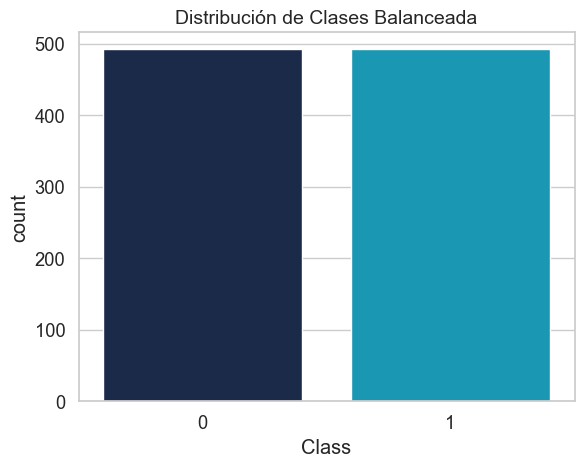

In [31]:
print('Distribución de las clases en el dataset creado')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df, hue='Class', palette=colors, legend=False)
plt.title('Distribución de Clases Balanceada', fontsize=14)
plt.show()


In [15]:
print('Porcentajes de transacciones normales:',len(new_df[new_df.Class==0])/len(new_df))
print('Porcentajes de transacciones fraudulentas:',len(new_df[new_df.Class==1])/len(new_df))
print('Cantidad total de transacciones:',len(new_df))

Porcentajes de transacciones normales: 0.5
Porcentajes de transacciones fraudulentas: 0.5
Cantidad total de transacciones: 984


### 4. Entrenamiento del Modelo Random Forest
Dividimos los datos en conjuntos de entrenamiento (train) y prueba (test). Entrenamos un clasificador de Bosques Aleatorios utilizando una semilla de aleatoriedad (random_state=42) para asegurar la reproducibilidad de los resultados.

In [16]:

#Creación del modelo
#Selección de variables

#new_df= new_df.drop(['scaledTime'],axis=1)
X= new_df.drop('Class',axis=1)
y=new_df['Class']

#División en training y testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=42)




In [17]:


#Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifier= RandomForestClassifier(n_estimators=100)
classifier.fit(X_train,y_train)

training_score= cross_val_score(classifier, X_train, y_train, cv=5)
print('Rendimiento:', classifier.__class__.__name__, round(training_score.mean(),2)*100,'% accuracy score')



Rendimiento: RandomForestClassifier 94.0 % accuracy score


In [18]:
preds= classifier.predict(X_test)

In [19]:
predictores =['V1',	'V2','V3','V4','V5','V6','V7','V8',	'V9','V10',\
              'V11','V12','V13','V14','V15','V16','V17','V18', 'V19',\
              'V20','V21','V22','V23','V24','V25','V26','V27','V28','V29',\
              'Amount']

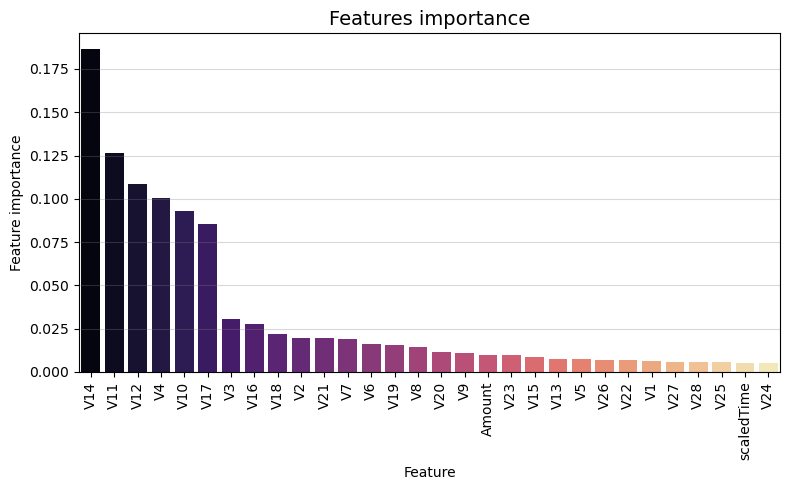

In [20]:

# 1. Preparamos los datos usando X_train.columns para evitar errores
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': classifier.feature_importances_})

# 2. RENOMBRAR: Cambiamos el nombre largo por 'Amount' para que sea igual al del profe
tmp['Feature'] = tmp['Feature'].replace('scaledAmount', 'Amount')

# 3. ORDENAR
tmp = tmp.sort_values(by='Feature importance', ascending=False)

# 4. GRAFICAR
plt.figure(figsize=(8, 5)) # Un toque más alto y ancho
plt.title('Features importance', fontsize=14)

# Agregamos hue='Feature' y legend=False para que no tire el cartel rojo de advertencia
s = sns.barplot(x='Feature', y='Feature importance', data=tmp, 
                palette='magma', hue='Feature', legend=False)

# 5. ESTILO IGUAL AL PROFE: Líneas grises de fondo
plt.grid(axis='y', color='gray', linestyle='-', alpha=0.3)
plt.xticks(rotation=90)

# Ajustamos para que no se corten los nombres abajo
plt.tight_layout() 

plt.show()

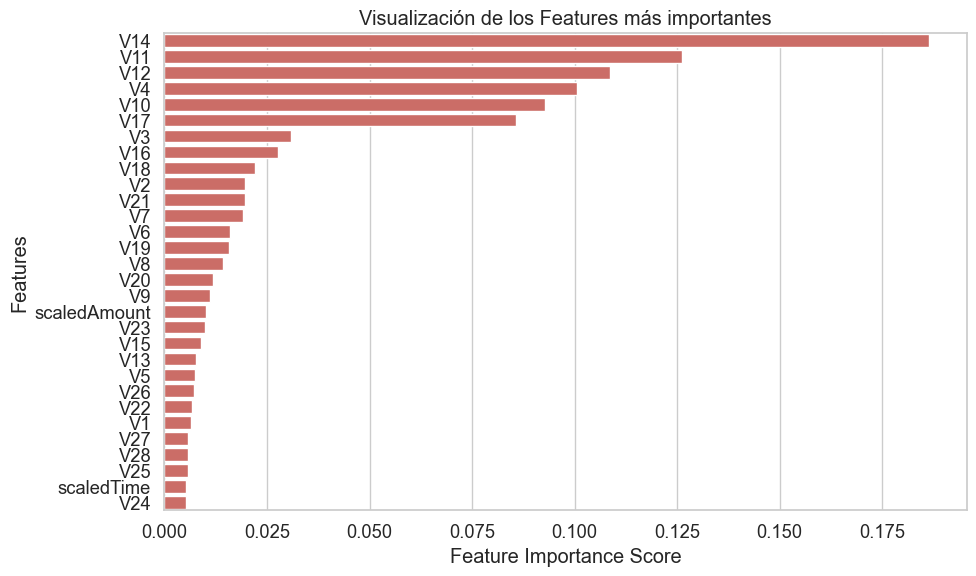

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='hls', font_scale=1.2)

feature_imp= pd.Series(classifier.feature_importances_,index= X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y= feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualización de los Features más importantes')
plt.tight_layout()



### 5. Evaluación de Desempeño
Analizamos la eficacia del modelo mediante la Matriz de Confusión y la Curva ROC. Nuestro objetivo principal es maximizar el 'Recall' para no dejar pasar fraudes reales, manteniendo una alta precisión.

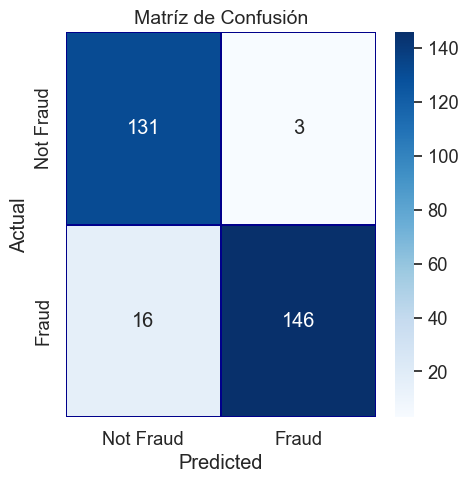

In [23]:
#matriz de confusion

cm= pd.crosstab(y_test,preds,rownames=['Actual'], colnames=['Predicted'])
fig, (ax1)= plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
            xticklabels=['Not Fraud','Fraud'],
            yticklabels=['Not Fraud','Fraud'],
            annot=True, ax=ax1,
            linewidths=.2,linecolor='Darkblue', cmap= 'Blues', fmt='g')


plt.title('Matríz de Confusión',fontsize=14)
plt.show()


In [24]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [25]:
print('Modelo utilizado: Bosques aleatorios')
acc = accuracy_score(y_test,preds)
print('Accuracy {}', format(acc))

prec=precision_score(y_test,preds)
print('Precision {}', format(prec))

rec=recall_score(y_test,preds)
print('Recall {}', format(rec))

f1=f1_score(y_test,preds)
print('F1 Score {}', format(f1))


Modelo utilizado: Bosques aleatorios
Accuracy {} 0.9358108108108109
Precision {} 0.9798657718120806
Recall {} 0.9012345679012346
F1 Score {} 0.9389067524115756


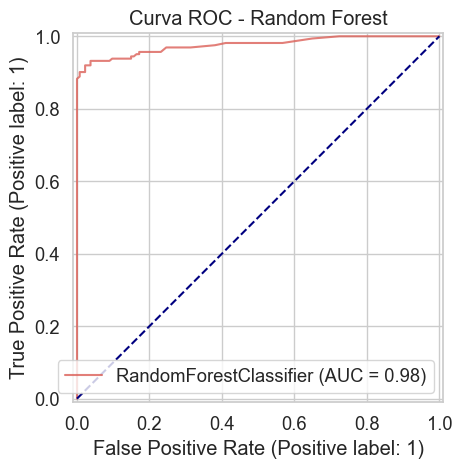

In [26]:
#Curva ROC

from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Creamos el gráfico de la Curva ROC
rfc_disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test, alpha=0.8)

plt.title('Curva ROC - Random Forest')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # Línea punteada de referencia
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,classifier.predict_proba(X_test,)[:,1])

np.float64(0.9761838953381242)

In [28]:
#reporte de clasificación
labels=['No Fraud','Fraud']
print(classification_report(y_test,preds,target_names=labels))



              precision    recall  f1-score   support

    No Fraud       0.89      0.98      0.93       134
       Fraud       0.98      0.90      0.94       162

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [29]:
import joblib

# Esto guarda tu modelo en un archivo real
joblib.dump(classifier, 'modelo_fraude_tarjetas.pkl')
print("¡Modelo guardado y listo para ser exportado al CV!")

¡Modelo guardado y listo para ser exportado al CV!
